In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./penguins.csv")
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data[data.sex == "."] 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [4]:

data = data.drop(index=336)

In [15]:

data.dropna(inplace=True)

In [16]:
df = pd.get_dummies(data)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False
340,46.8,14.3,215.0,4850.0,True,False
341,50.4,15.7,222.0,5750.0,False,True
342,45.2,14.8,212.0,5200.0,True,False


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)
proessed = pd.DataFrame(X, columns=df.columns)
proessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.896113,0.774517,-0.126674,-0.569485,-0.988095,0.988095
1,-0.822764,0.114726,-0.107681,-0.507204,1.012049,-1.012049
2,-0.676065,0.419245,-0.073493,-1.192302,1.012049,-1.012049
3,-1.336209,1.079036,-0.081090,-0.943175,1.012049,-1.012049
4,-0.859439,1.738827,-0.092486,-0.694049,-0.988095,0.988095
...,...,...,...,...,...,...
329,0.589210,-1.763140,-0.001319,0.894133,1.012049,-1.012049
330,0.515861,-1.458621,0.002479,0.800711,1.012049,-1.012049
331,1.176005,-0.748077,0.029070,1.921780,-0.988095,0.988095
332,0.222464,-1.204855,-0.008917,1.236682,1.012049,-1.012049


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
peng_pca = pca.fit_transform(proessed)


c:\Users\Dustella\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dustella\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dustella\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\Dustella\AppData\Local\Programs\Python\Python312\Lib\si

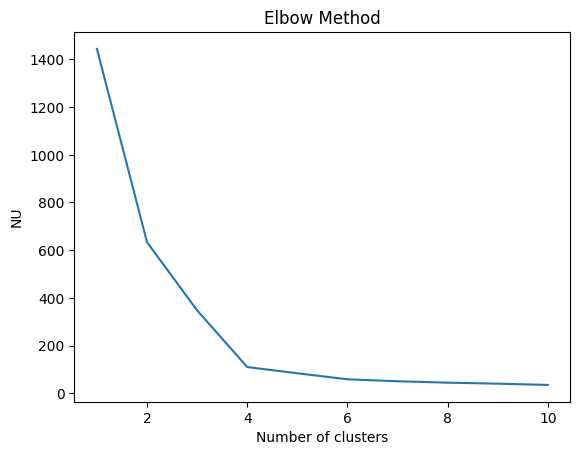

In [20]:
from sklearn.cluster import KMeans

nu = []

# draw plots about cluster numbers from 1-10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(peng_pca)
    nu.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1, 11), nu)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("NU")

plt.show()

c:\Users\Dustella\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


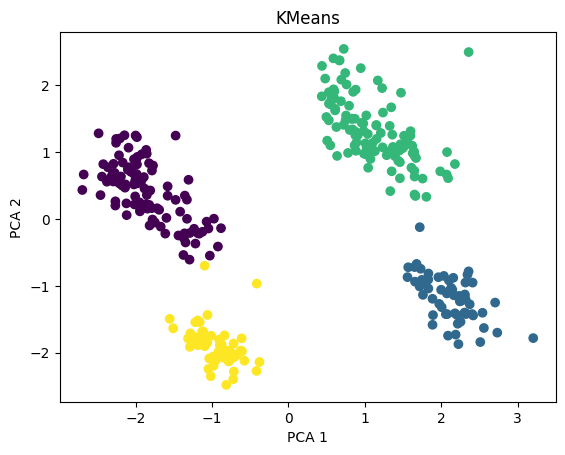

In [21]:
km = KMeans(n_clusters=4, random_state=0).fit(peng_pca)

# scatter plot
plt.scatter(peng_pca[:, 0], peng_pca[:, 1], c=km.labels_)
plt.title("KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()